# Анализ выбора иностранного языка для моего личного изучения. 
## 1. Oписание задачи.

Мое поступление на международные отношения в ВШЭ обьясняется возможностью изучать второй иностранный язык. Более того, на 1 курсе у меня был выбор языка на все 4 года. Я остановился на итальяснком. В целом, я доволен, да и в настоящий момент я ничего уже не могу изменить. Однако попробовать рассмотреть проблему с математической точки зрения - описать ситуацию принятия решения и найти наиболее подходящие вырианты - было бы как минимум интересно. Можно выяснить, насколько рациональным оказалось мое решение. 

[github](https://github.com/sblenlkj/Decision_Theory_HW1) c тетрадкой в формате ipynb и py файлом.

Критерии я придумал и оценил самостоятельно, в работе нет источников. Я бы мог привести много ссылок, например: для критерия популярность языка в мире вот [статья](https://rsr-online.ru/news/2023/12/12/kitajskij-yazyk-segodnya-odin-iz-naibolee-vostrebovannyh/) про огромную популярность китайского, но не стал - анализ проводится для моего выбора, по моему пониманию/ощущениям. 

- Всего **12** альтернатив, **8** критериев.
- Важность критериев (т е наличие весов при линейной свертке) расписана в пункте 4.
- Один критерий (сложность языка) отрансформирован по ходу работы.

Подробное описание критериев приведено ниже.

Сами критерии/данные лежат в [google table](https://docs.google.com/spreadsheets/d/1BjxEzv5vkQWrrzuMihoAJ5j0SwlBup7uKXhzTtk8LKI/edit?gid=0#gid=0). Таблица открыта на чтение, поэтому можно cделать get request и спарсить данные без входа в гугл аккаунт. Написаная для этого функция находится в модуле some_code. 

In [1]:
from some_code import get_df

Выведем на экран смысл критериев.

In [73]:
url = 'https://docs.google.com/spreadsheets/d/1BjxEzv5vkQWrrzuMihoAJ5j0SwlBup7uKXhzTtk8LKI/edit?gid=661239292#gid=661239292'
columns_df = get_df(url, to_int_flag=False)
for i, ind in enumerate(columns_df.index):
    print(f"{i}. {ind} - {columns_df.loc[ind, 'meaning']}\n")

0. world_prev - распространенность в мире: чем больше, тем лучше - можно использовать язык при поездках по миру, найти работу и т д.

1. popularity_in_Rus - популярность в качестве второго иностранного в Роccии. С одной стороны, чем больше, тем лучше (значит модно, молодежно), с другой - тяжелее найти работу / применить язык на практике в нашей стране. Я не стал трансформировать, оставив первый вариант.

2. rel_with_Rus - отношения с Россией в стране этого языка: чем они лучше, тем выше показатель. Критерий влияет на возможность найти работу в России с необходимостью в данном языке. Возникла сложность, например: для немецкого все понятно, для испанского - сложнее - кроме недружественной Испании есть еше страны Латинской Америки, где все более менее хорошо в отношении России.

3. need_in_Rus - насколько сильно этот язык требуется в России - его знание поможет найти работу: чем выше, тем лучше. Предыдущий показатель скорее отражает будущее, данный - ситуацию и необходимость в настоящий м

Теперь подгрузим числовые данные. При оценивании я ставил баллы от 1 до 5. В [таблице]() колонки названы нормально (как выше), однако названия очень длинные - в пдф файле таблица переносится на следующую строку - неудобно. Поэтому от их названия оставлены только 3 первые буквы.

In [38]:
url = 'https://docs.google.com/spreadsheets/d/1BjxEzv5vkQWrrzuMihoAJ5j0SwlBup7uKXhzTtk8LKI/edit?gid=0#gid=0'
main_df = get_df(url)
main_df.rename(columns={k: k[:3] for k in main_df.columns}, inplace=True)
main_df

,wor,pop,rel,nee,des,abi,hse,com
arabian,4,5,5,4,2,3,3,4
chinese,5,5,5,5,1,2,2,5
corean,1,2,3,3,1,1,2,4
deutsch,3,3,3,3,3,3,4,2
french,3,3,2,1,2,1,3,2
hebrew,1,2,4,2,4,5,3,4
italian,1,2,3,3,4,4,4,1
japanese,2,4,2,3,1,1,3,5
polish,1,1,1,1,1,1,1,2
portuguese,3,3,3,3,2,1,3,2


## 2. Нормализация.
Изначально у меня был еще булевый критерий - есть ли язык на нашей программе. Его наличие в шкале 1 и 0 (а не 1 и 5 как остальные) / проведение любой стандартизации не повлияло бы на само множество Парето, только на результаты линейной свертки. Поэтому, по моему мнению, его можно было бы и оставить (1 и 0), но из-за критериев дз я его убрал.

Ниже приведено применение 3-х основных видов стандартизации и выбран MaxAbsScaler для дальнейшей работы.

In [39]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, Normalizer

columns, index = main_df.columns, main_df.index

Как вы отметили на лекции, MinMaxScaler занулит некоторые "средние" результаты (например, 2, когда оценки находятся между 2 и 4), чего не хотелось бы в контексте использования линейной свертки. 

In [40]:
result = MinMaxScaler().fit_transform(main_df)
main_df_min_max = pd.DataFrame(result, columns=columns, index=index)
main_df_min_max.head()

,wor,pop,rel,nee,des,abi,hse,com
arabian,0.75,1.00,1.00,0.75,0.333333,0.50,0.666667,0.75
chinese,1.00,1.00,1.00,1.00,0.000000,0.25,0.333333,1.00
corean,0.00,0.25,0.50,0.50,0.000000,0.00,0.333333,0.75
deutsch,0.50,0.50,0.50,0.50,0.666667,0.50,1.000000,0.25
french,0.50,0.50,0.25,0.00,0.333333,0.00,0.666667,0.25


Приведение к нормальному распределению даст числа, с которыми будет неудобно работать в дальнейшем - не подходит.

In [42]:
result = Normalizer().fit_transform(main_df.T).T
main_df_norm = pd.DataFrame(result.round(2), columns=columns, index=index)
main_df_norm.head()

,wor,pop,rel,nee,des,abi,hse,com
arabian,0.41,0.43,0.42,0.37,0.26,0.35,0.29,0.36
chinese,0.52,0.43,0.42,0.46,0.13,0.23,0.20,0.45
corean,0.10,0.17,0.25,0.28,0.13,0.12,0.20,0.36
deutsch,0.31,0.26,0.25,0.28,0.39,0.35,0.39,0.18
french,0.31,0.26,0.17,0.09,0.26,0.12,0.29,0.18


Рассматривая MaxAbsScaler, нужно взглянуть на макс оценок - я ставил от 1 до 5, может быть уже все стандартизировано.

In [43]:
def print_max_min(df):
    for (col, minv, maxv) in zip(columns, df.min(axis=0).values, df.max(axis=0).values):
        print(f'"{col}": [{minv}, {maxv}]')

print_max_min(main_df)

"wor": [1, 5]
"pop": [1, 5]
"rel": [1, 5]
"nee": [1, 5]
"des": [1, 4]
"abi": [1, 5]
"hse": [1, 4]
"com": [1, 5]


В "desire_to_live" и "hse" максимально 4, можно применить MaxAbsScaler, округлить результаты и перевести в шкалу от 20 (или 25) до 100, например.

In [44]:
result = MaxAbsScaler().fit_transform(main_df)
main_df_max = (pd.DataFrame(result, columns=columns, index=index) * 100).astype(int)
main_df_max.head()

,wor,pop,rel,nee,des,abi,hse,com
arabian,80,100,100,80,50,60,75,80
chinese,100,100,100,100,25,40,50,100
corean,20,40,60,60,25,20,50,80
deutsch,60,60,60,60,75,60,100,40
french,60,60,40,20,50,20,75,40


Стандартизировано:

In [45]:
print_max_min(main_df_max)

"wor": [20, 100]
"pop": [20, 100]
"rel": [20, 100]
"nee": [20, 100]
"des": [25, 100]
"abi": [20, 100]
"hse": [25, 100]
"com": [20, 100]


## 3. Построение графа Парето и нахождение множества Парето.

### 3.1. Нахождение множества Парето.
Сушествует функция для нахождения множества Парето (библиотека [paretoset](https://pypi.org/project/paretoset/)). Она принимает два аргумента: датафрейм и список, состоящий из строк "min" / "max" - способ обращения со значением признака, чтобы критерии, значения которых надо минимизировать, не трансформировать в максимизацию. Для нас таким критерием является сложность с индексом 7.

In [46]:
from paretoset import paretoset

Первый слой Парето:

In [47]:
sense = ["max"]*8
sense[7] = "min"

first_pareto_mask = paretoset(main_df_max, sense=sense)
main_df_max[first_pareto_mask]

,wor,pop,rel,nee,des,abi,hse,com
arabian,80,100,100,80,50,60,75,80
chinese,100,100,100,100,25,40,50,100
deutsch,60,60,60,60,75,60,100,40
hebrew,20,40,80,40,100,100,75,80
italian,20,40,60,60,100,80,100,20
spanish,80,100,100,80,25,20,75,20


Можно найти последующие (2-й, 3-й...) слои Парето:

In [48]:
def paretoset_all(df, sense, level=1, dct=None):
    if dct is None:
        dct = {}
    
    if not len(df):
        return 

    mask = paretoset(df, sense=sense)
    languages = list(df.index[mask].values)

    print(f"{level}. {', '.join(languages)}")
    dct[level] = languages

    paretoset_all(df[~mask], sense, level=level+1, dct=dct)
    return dct


pareto_dct = paretoset_all(main_df_max, sense)

1. arabian, chinese, deutsch, hebrew, italian, spanish
2. japanese, portuguese, turkish
3. corean, french
4. polish


Мы видим, что в первый слой множества Парето вошли 6 языков:
- deutsch, hebrew, italian - языки, который лично мне нравятся и я их учил/учу (поэтому высоко оценил их). 
- arabian, chinese, spanish - я считаю их очень нужными в современном мире.

Поэтому не удивительно, что по моим оценкам они попали в первый слой. Также у меня нет вопросов к худшему месту польского, хотя немного неожиданно, что французский оказался в третьем слое, а не во втором.

### 3.2. Построение графа Парето

Построим граф. В первую очередь найдем доминирующие вершины - для этого сравним попарно все вершины между собой. Однако для моего кода ниже уже потребуется трансформировать колонку complexity - создать complexity_reversed. 

In [51]:
main_df_max_corrected = main_df_max.copy()
main_df_max_corrected['com_rev'] = 120 - main_df_max_corrected['com']
main_df_max_corrected.drop(['com'], axis=1, inplace=True)
main_df_max_corrected.head(1)

,wor,pop,rel,nee,des,abi,hse,com_rev
arabian,80,100,100,80,50,60,75,40


In [52]:
from collections import defaultdict

def links(df):
    languages = list(df.index)
    links_dct = defaultdict(list)

    for i in range (len(languages)):
        for k in range(i+1, len(languages)):
            lang_i, lang_k = languages[i], languages[k]

            if all(df.iloc[i, :] >= df.iloc[k, :]):
                links_dct[lang_i].append(lang_k)
            elif all(df.iloc[i, :] <= df.iloc[k, :]):
                links_dct[lang_k].append(lang_i)
    
    return links_dct


links_dct = links(main_df_max_corrected)    

Функция для отрисовывания графа занимает достаточно много места в финальном pdf, поэтому также была перенесена в модуль some_code.

In [53]:
from some_code import draw_graph

def find_edges(links_dct):
    return [(k, v) for k in links_dct for v in links_dct[k]]

edges = find_edges(links_dct)
pareto_dct_reversed = {v: k for k in pareto_dct for v in pareto_dct[k]}
levels_number = len(pareto_dct)

draw_graph(pareto_dct_reversed, edges, levels_number)

graph.html


Отобразить интерактивный html файл внутри ячейки не получилось, поэтому я открыл в safari и сделал скрин. Вот он:

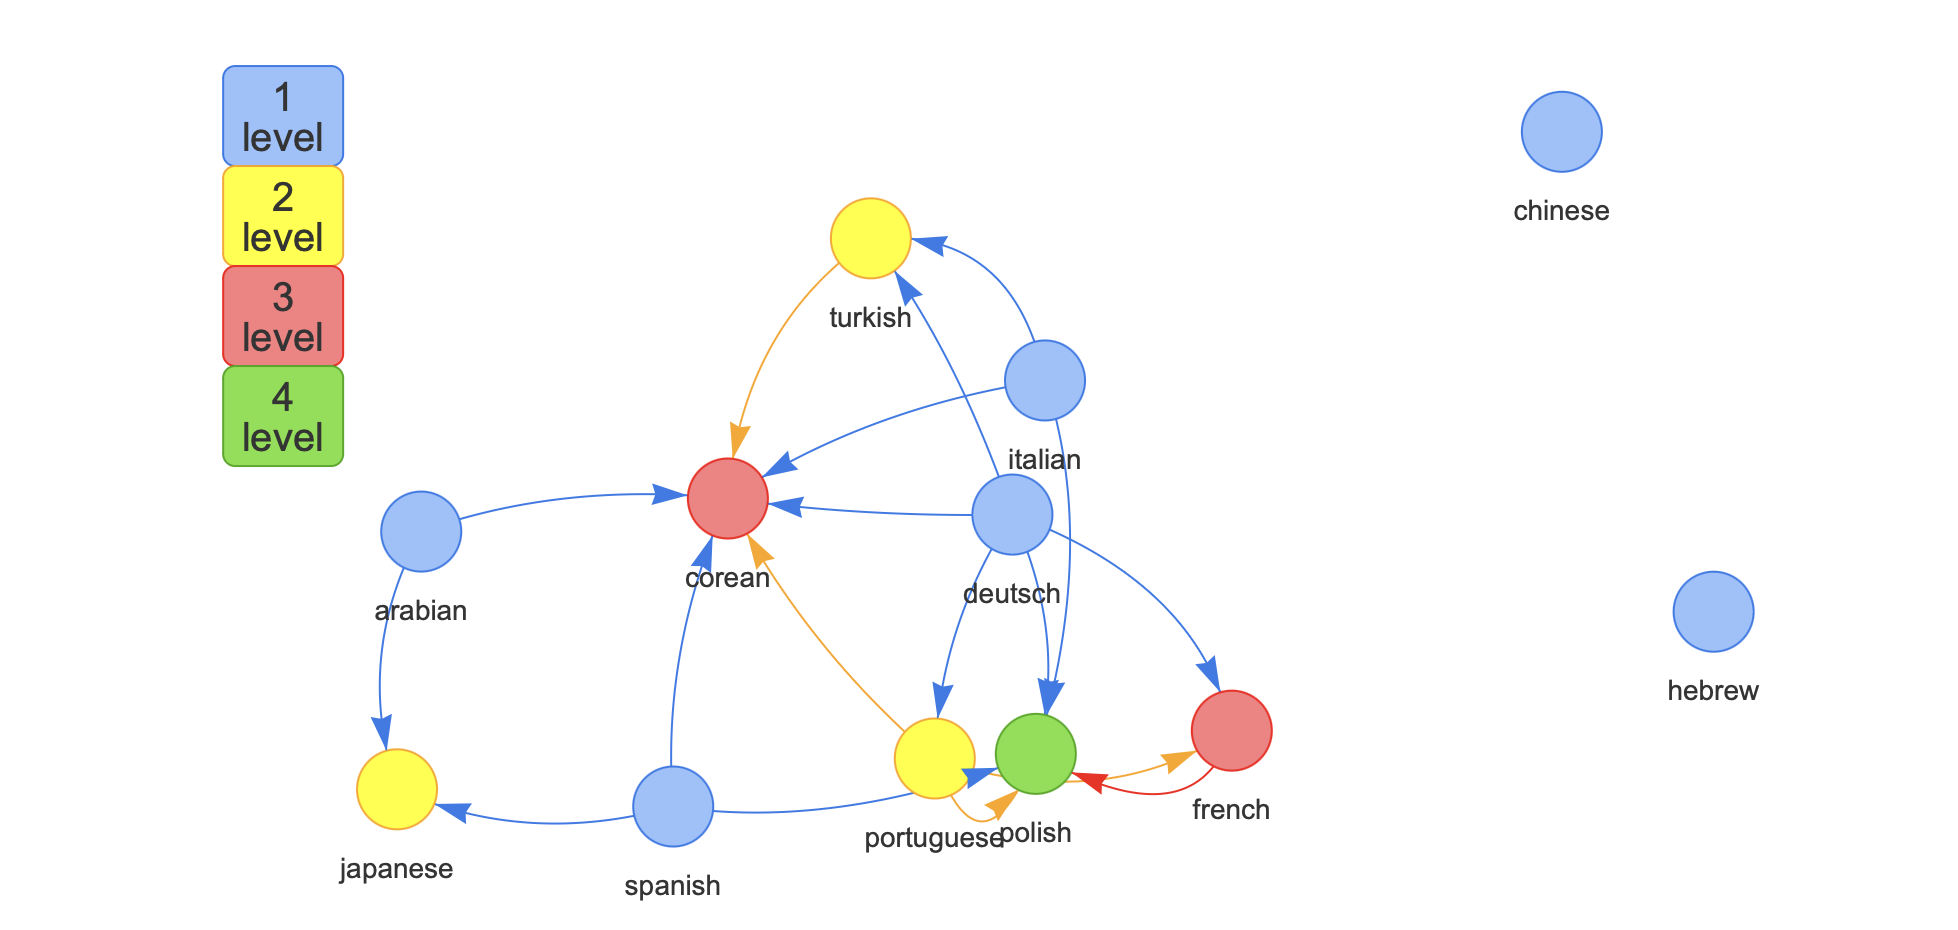

In [96]:
from IPython.display import Image
Image(filename='graph_screen1.png') 

## 4. Определение одной альтернативы.
### 4.1. Суммирование критериев.
Возьмем только первый слой Парето, подобранные веса и проведем вычисления. Наши критерии можно поделить на 3 типа: связанные с 
- процессом изучения: hse, complexity_reversed
- необходимостью в языке, если я останусь в России: popularity_in_Rus, rel_with_Rus, need_in_Rus
- необходимостью в языке, если я уеду: desire_to_live, ability_to_live

Создадим три типа весов (вектор длиной 8), каждый из которых будет давать большое значение одной из групп. Например, importance1 [2, 1, 2, 2, 1, 2, 3, 4] - дает большее значение процессу изучения вес hse = 3, complexity_reversed = 4 при средних 1 или 2. Расписывать подробнее, что для меня важнее complexity_reversed, чем hse (см отличие в таблице выше), поэтому вес больше и т д я не стал. 

In [54]:
import numpy as np

def get_results_sum(df: pd.DataFrame, importance: np.array):
    results = df.dot(importance).sort_values(ascending=False)
    show_results(results)

def show_results(results: pd.Series):
    for i, (lang, value) in enumerate(results.items()):
        print(f"{i+1}. {lang} = {value}")

first_pareto_df = main_df_max_corrected[first_pareto_mask]
first_pareto_df

,wor,pop,rel,nee,des,abi,hse,com_rev
arabian,80,100,100,80,50,60,75,40
chinese,100,100,100,100,25,40,50,20
deutsch,60,60,60,60,75,60,100,80
hebrew,20,40,80,40,100,100,75,40
italian,20,40,60,60,100,80,100,100
spanish,80,100,100,80,25,20,75,100


Большие веса критериев процесса изучения.

In [55]:
importance1 = np.array([2, 1, 2, 2, 1, 2, 3, 4])
get_results_sum(first_pareto_df, importance1)

1. spanish = 1310
2. italian = 1280
3. deutsch = 1235
4. arabian = 1175
5. chinese = 1035
6. hebrew = 1005


На первом месте находится испанский, поэтому это наша одна альтернатива, выделенная на основе суммировании критериальных оценок с учетом важности критериев. Однако мы можем уведеть 2-ую, 3-ую и т д альтернативы, а также числовой результат, с помощью которого можно определить разрыв между местами. Ниже я обращаю большее внимание именно на него. 

Первое и второе место занимают языки романской группы, которые, безусловно, проще. Последние - иврит и китайский, сами по себе очень сложные.

Большие веса критериев, связанных с Россией.

In [56]:
importance2 = np.array([2, 2, 4, 3, 1, 1, 2, 1])
get_results_sum(first_pareto_df, importance2)

1. arabian = 1300
2. spanish = 1295
3. chinese = 1285
4. deutsch = 1075
5. italian = 1020
6. hebrew = 950


Тут тоже все логично: арабский мир, страны ЛА (испанский) и Китай - наиболее перспективные направления внешне-торговой активности России. Нужно учить эти языки.

Большие веса критериев, связанных с эмиграцией.

In [57]:
importance3 = np.array([2, 1, 1, 1, 3, 4, 2, 2])
get_results_sum(first_pareto_df, importance3)

1. italian = 1220
2. hebrew = 1130
3. deutsch = 1125
4. arabian = 1060
5. spanish = 945
6. chinese = 875


Здесь появились первые сюрпризы: с огромным отличием лидирует итальянский (что нормально), но на 2-ом и 3-ем местах с незначительным отличием расположились иврит и немецкий, которого я не ожидал увидеть. По моим ощущениям на 1/2-х местах должны были быть итальянский и иврит с близкими результатами, на 3-ем - арабский... Есть о чем задуматься.

### 4.2. Близость к идеальной точке.

Логика суммирования китериев / близости к идеальной точке - аналогично l1 / l2 норме, т е при близости к идеальной точке обьект с со средними результатами (точнее без слишком плохих показателей) будет лучше обьекта с большим разбросом (и 20, и 100). Поэтому мне бы сначала хотелось посмотреть на результаты без весов.

П С в данном вычислении наша незначительная стандартизация сыграла роль: без нее языки на 1-ом и 2-ом местах менялись местами. Интересно и неожиданно. 

In [58]:
def get_results_ideal_point(df, importance=None):
    ideal_point = df.max(axis=0).values
    results_df = (df - ideal_point).map(np.square)

    if importance is not None:
        results_df *= importance
    
    results = results_df.sum(axis=1).map(np.sqrt).sort_values()
    
    show_results(np.round(results, 3))

    return results_df

results_df = get_results_ideal_point(first_pareto_df)

1. deutsch = 95.0
2. arabian = 95.525
3. spanish = 115.974
4. italian = 116.619
5. chinese = 134.629
6. hebrew = 135.0


Результаты согласуются с моим мнением: арабский и немецкий достаточно интересны для меня, могут пригодиться и в России, и за рубежом - у них нет серьезных недостатков с моей точки зрения (а значит и по нашим данным тоже). Отдельно можно посмотреть на "слабые стороны" - критерии, принесшие наибольший результат в финальную сумму для некоторых языков:

In [59]:
results_df

,wor,pop,rel,nee,des,abi,hse,com_rev
arabian,400,0,0,400,2500,1600,625,3600
chinese,0,0,0,0,5625,3600,2500,6400
deutsch,1600,1600,1600,1600,625,1600,0,400
hebrew,6400,3600,400,3600,0,0,625,3600
italian,6400,3600,1600,1600,0,400,0,0
spanish,400,0,0,400,5625,6400,625,0


- китайский - его сложность и мое нежелание жить в Китае
- испанский - мое нежелание жить в ЛА
- итальянский, иврит - не самая широкая распространенность в мире и потребность в России

Ради выполнения критерия об учете важности критериев посмотрим на результаты с учетом вектора весов и сравним с методом суммирования.

In [60]:
def compare_two_results(df, importance):
    print("summing")
    get_results_sum(df, importance)
    print("\nideal point")
    get_results_ideal_point(df, importance=importance)

compare_two_results(first_pareto_df, importance1)

summing
1. spanish = 1310
2. italian = 1280
3. deutsch = 1235
4. arabian = 1175
5. chinese = 1035
6. hebrew = 1005

ideal point
1. deutsch = 128.938
2. spanish = 147.986
3. arabian = 153.542
4. italian = 153.623
5. hebrew = 201.68
6. chinese = 214.301


Больший вес критериев, связанных с Россией

In [61]:
compare_two_results(first_pareto_df, importance2)

summing
1. arabian = 1300
2. spanish = 1295
3. chinese = 1285
4. deutsch = 1075
5. italian = 1020
6. hebrew = 950

ideal point
1. arabian = 104.642
2. spanish = 123.592
3. deutsch = 142.215
4. chinese = 143.614
5. italian = 177.764
6. hebrew = 193.003


Больший вес критериев, связанных с эмиграцией

In [62]:
compare_two_results(first_pareto_df, importance3)

summing
1. italian = 1220
2. hebrew = 1130
3. deutsch = 1125
4. arabian = 1060
5. spanish = 945
6. chinese = 875

ideal point
1. deutsch = 130.671
2. italian = 145.602
3. arabian = 153.46
4. hebrew = 169.853
5. spanish = 211.955
6. chinese = 221.529


Несмотря на веса, арабский и немецкий (наши "середняки") при методе близости к идеальной точке всегда входят в топ 3, т е результаты не слишком отличаются от результатов без учета весов - в нашем масштабе критериев (до 100), квадрат разности вносит большее значение. Поэтому лично для меня результаты с весами менее интересны и более предсказуемы - в них лидеры по методу суммирования дополнены арабским и немецким.

### * Наиболее сильный критерий.
Найдя "слабый" критерий для части языков, мне захотелось посмотреть на важность самих критериев, т е колонок в нашем графе Парето. Я бы хотел это сделать аналогично нахождению feature importance в модели случайного леса: уберем каждую колонку и посмотрим на разницу между парами доминирующих и доминируемых вершин. 

In [63]:
def calculate_column_importance(df):
    edges_set = set(find_edges(links(df)))
    for column in df.columns:
        new_edges_set = set(find_edges(links(df.drop(column, axis=1))))
        print(f"{column} = {len(edges_set ^ new_edges_set)}")

calculate_column_importance(main_df_max_corrected)

wor = 0
pop = 2
rel = 0
nee = 1
des = 2
abi = 2
hse = 1
com_rev = 11


К моиму удивлению, критерий сложности влияет очень сильно. Можно посмореть на граф Парето без его учета. 

In [66]:
df_without_complexity = main_df_max_corrected.drop("com_rev", axis=1)

pareto_dct = paretoset_all(df_without_complexity, ["max"]*7)
links_dct = links(df_without_complexity)

edges = find_edges(links_dct)
pareto_dct_reversed = {v: k for k in pareto_dct for v in pareto_dct[k]}
levels_number = len(pareto_dct)

draw_graph(pareto_dct_reversed, edges, levels_number)

1. arabian, chinese, deutsch, hebrew, italian
2. portuguese, spanish, turkish
3. corean, french, japanese
4. polish
graph.html


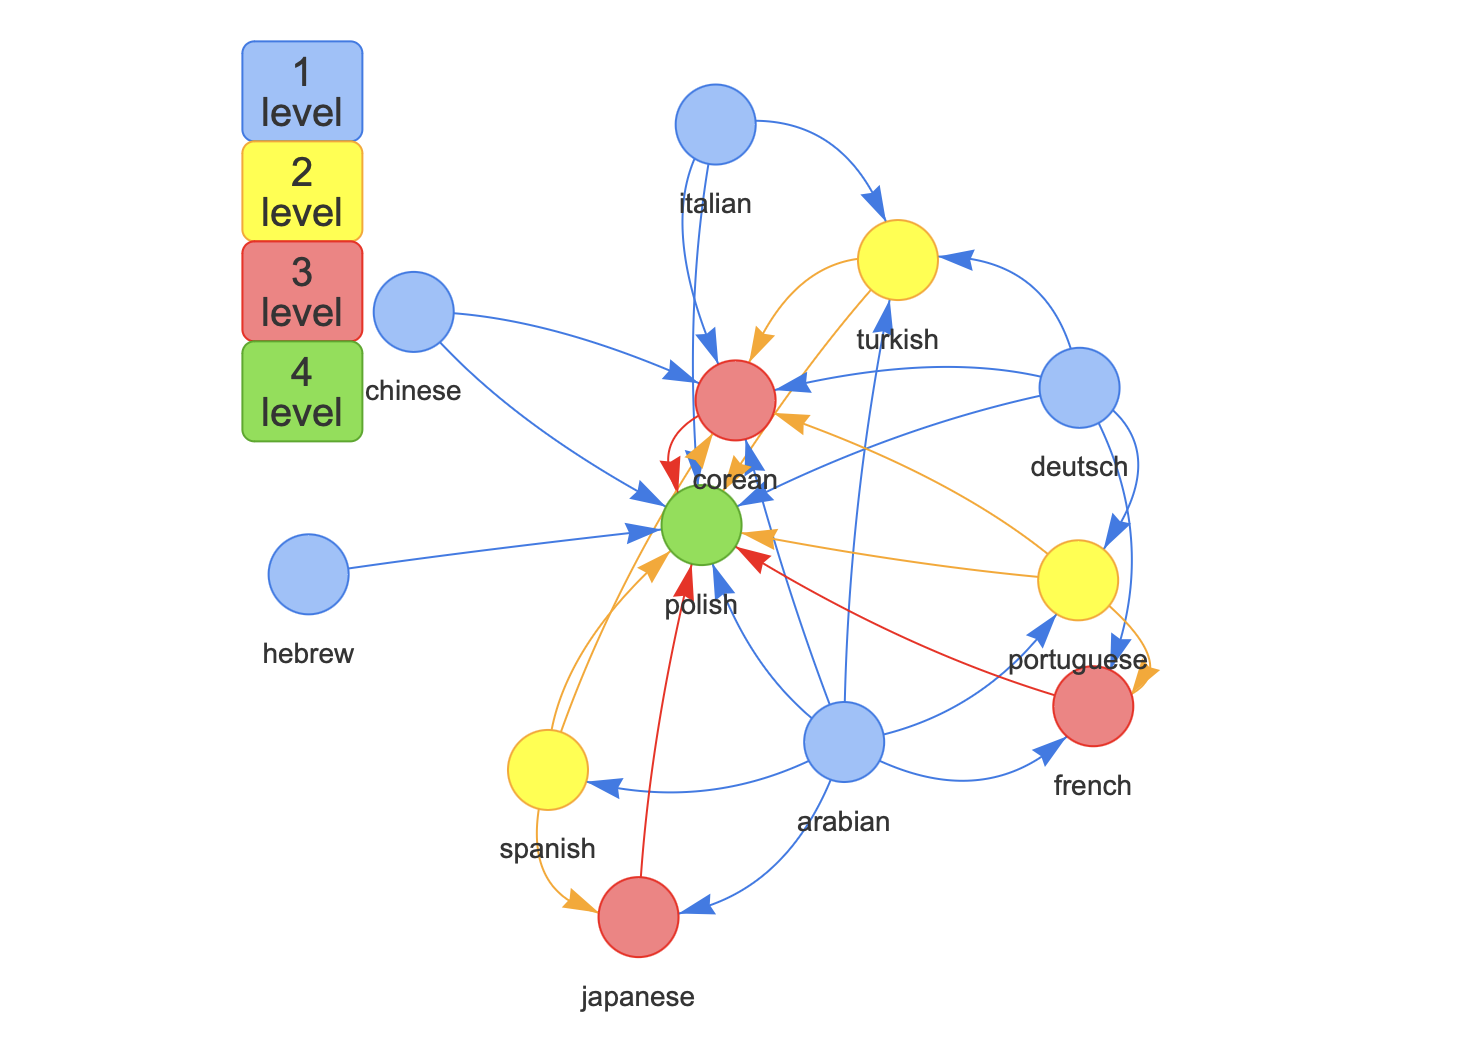

In [97]:
Image(filename='graph_screen2.png') 

В целом, испанский теперь доминируется арабским (поэтому он выпал из первого слоя Парето) и все языки доминируют польский. При взгляде на данные все стало ясно - языки с хорошими показателями по многим критериям (арабский, китайский, иврит) обладают высокой сложностью, что не позволяет им доминировать над тем же польским, обладающим минимальными оценками. 

Сами слои существенно не изменились, но все равно было интересно посмотреть. 

## 5. Выводы

Анализ, интерпретация, мое мнение приведено по ходу работы. В данном пункте мне бы хотелось подвести общий итог. 

Я понимал, что достаточно взять несколько "неполезных" для меня языков (тот же польский, корейский), поставить им невысокие оценки, в первом слое Парето получить итальянский / иврит, посчитать и тоже увидеть их на первых местах в рейтинге. Но все равно некоторые результаты были интересны: французский в третьем слое Парето, неожиданные результаты при суммировании с вектором importance3 (см выше), большая роль критерия сложность. 

Поэтому большое спасибо за задание, занятия онлайн и подробное обьяснение на семинарах 

\\ (•◡•) /